**Technical Exercise for Data Scientist Candidates**

CHHANAK TANK

(M) +91 9764005626

chhanaktank346@gmail.com

---
---
---

In [72]:
#importing libraries
import pandas as pd
import numpy as np

### Improting and exploring Dataset

In [73]:
data=pd.read_csv(r"/content/drive/MyDrive/BeerDataScienceProject.csv", encoding='latin-1')

Overview of Dataset

In [74]:
data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


---
---
---


**Exploratory Analysis**

Things to Look For:
1. Types of data
2. Missing data
3. Duplicate data
4. Unsuitable data

In [75]:
data.shape

(528870, 13)

**1. Types of Data**

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [77]:
data.describe(include='all')

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
count,508590.000000,528870.000000,528870.000000,528870,528870,528870.000000,528870.000000,528870.000000,528870.000000,528755,528870.000000,528751,5.288700e+05
unique,NaN,NaN,NaN,18339,104,NaN,NaN,NaN,NaN,22800,NaN,528371,NaN
top,NaN,NaN,NaN,Sierra Nevada Celebration Ale,American IPA,NaN,NaN,NaN,NaN,northyorksammy,NaN,#NAME?,NaN
freq,NaN,NaN,NaN,3000,43369,NaN,NaN,NaN,NaN,1858,NaN,92,NaN
mean,7.017442,22098.466016,2598.423429,NaN,NaN,3.864522,3.758926,3.833197,3.765993,NaN,3.817350,NaN,1.224885e+09
std,2.204460,22158.284352,5281.805350,NaN,NaN,0.604010,0.685335,0.709962,0.669018,NaN,0.718903,NaN,7.605600e+07
min,0.010000,3.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,NaN,1.000000,NaN,8.843904e+08
25%,5.300000,1745.000000,132.000000,NaN,NaN,3.500000,3.500000,3.500000,3.500000,NaN,3.500000,NaN,1.174613e+09
50%,6.500000,14368.000000,394.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,NaN,4.000000,NaN,1.240366e+09
75%,8.500000,40528.000000,1475.000000,NaN,NaN,4.000000,4.000000,4.500000,4.000000,NaN,4.500000,NaN,1.288560e+09


---
---

> **Changing rewiev_time column from epoch time into DateTime datatime**

>> If we look at the ‘.head()’ output we notice that the ‘review_time’ column is made up of long, large numbers with the data type ‘int64’. This is called ‘epoch time’ which is the time in seconds since Jan 1st 1970. Therefore pandas has a way to convert the int64 data type into a ‘DateTime’ datatype.



In [78]:
#putting the column name in quotation marks and square brackets 
#directly after the data frame calls out that column only, and using 
#pd.to_datetime() on our 'review time' column (with units as #seconds) we can convert the whole column to datetime

data['review_time'] =pd.to_datetime(data['review_time'],unit='s')

#printing out the new and updated data types and the column head
print(data.dtypes)
print(data['review_time'].head())

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
dtype: object
0   2009-02-16 20:57:03
1   2009-03-01 13:44:57
2   2009-03-01 14:10:04
3   2009-02-15 19:12:25
4   2010-12-30 18:53:26
Name: review_time, dtype: datetime64[ns]


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            508590 non-null  float64       
 1   beer_beerId         528870 non-null  int64         
 2   beer_brewerId       528870 non-null  int64         
 3   beer_name           528870 non-null  object        
 4   beer_style          528870 non-null  object        
 5   review_appearance   528870 non-null  float64       
 6   review_palette      528870 non-null  float64       
 7   review_overall      528870 non-null  float64       
 8   review_taste        528870 non-null  float64       
 9   review_profileName  528755 non-null  object        
 10  review_aroma        528870 non-null  float64       
 11  review_text         528751 non-null  object        
 12  review_time         528870 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64

In [80]:
data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26


Now, we can see 'review_time' in readable format.

---
---

**2. Missing Data**

> 2.1 Count Null Values

In [81]:
print(data.isnull().sum())

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64


> 2.2 Percent Null Values

In [82]:
# Percent of data missing `beer_abv` values
print("Percent Null Values of `beer_abv` column:", round(20280 / 528870 * 100, 2),"%")

Percent Null Values of `beer_abv` column: 3.83 %


> 2.3 Drop Null Values

In [83]:
# Drop null row values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508358 entries, 0 to 528796
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            508358 non-null  float64       
 1   beer_beerId         508358 non-null  int64         
 2   beer_brewerId       508358 non-null  int64         
 3   beer_name           508358 non-null  object        
 4   beer_style          508358 non-null  object        
 5   review_appearance   508358 non-null  float64       
 6   review_palette      508358 non-null  float64       
 7   review_overall      508358 non-null  float64       
 8   review_taste        508358 non-null  float64       
 9   review_profileName  508358 non-null  object        
 10  review_aroma        508358 non-null  float64       
 11  review_text         508358 non-null  object        
 12  review_time         508358 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64

>> Removing all null values only impacts the size of the dataset by a little over 3.8%.

In [84]:
print(data.isnull().sum())

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64


---
---

**3. Duplicate Data**

> If a user has rated the same beer more than once, then only keep their highest rating.

In [85]:
# Sort by user overall rating first
data = data.sort_values('review_overall', ascending=False)

# Keep the highest rating from each user and drop the rest 
data = data.drop_duplicates(subset= ['review_profileName','beer_name'], keep='first')

# Peep structure
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502769 entries, 492945 to 39638
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            502769 non-null  float64       
 1   beer_beerId         502769 non-null  int64         
 2   beer_brewerId       502769 non-null  int64         
 3   beer_name           502769 non-null  object        
 4   beer_style          502769 non-null  object        
 5   review_appearance   502769 non-null  float64       
 6   review_palette      502769 non-null  float64       
 7   review_overall      502769 non-null  float64       
 8   review_taste        502769 non-null  float64       
 9   review_profileName  502769 non-null  object        
 10  review_aroma        502769 non-null  float64       
 11  review_text         502769 non-null  object        
 12  review_time         502769 non-null  datetime64[ns]
dtypes: datetime64[ns](1), flo

In [86]:
# Percent of data that are duplicates
print("Percent of Duplicate Values:", round((508358 - 502769)/ 508358 * 100, 2),"%")

Percent of Duplicate Values: 1.1 %


> Removing all duplicate values drops about 1.1% of the remaining data.

In [87]:
import matplotlib.pyplot as plt

---
---

**4. Overview of Numeric Features**

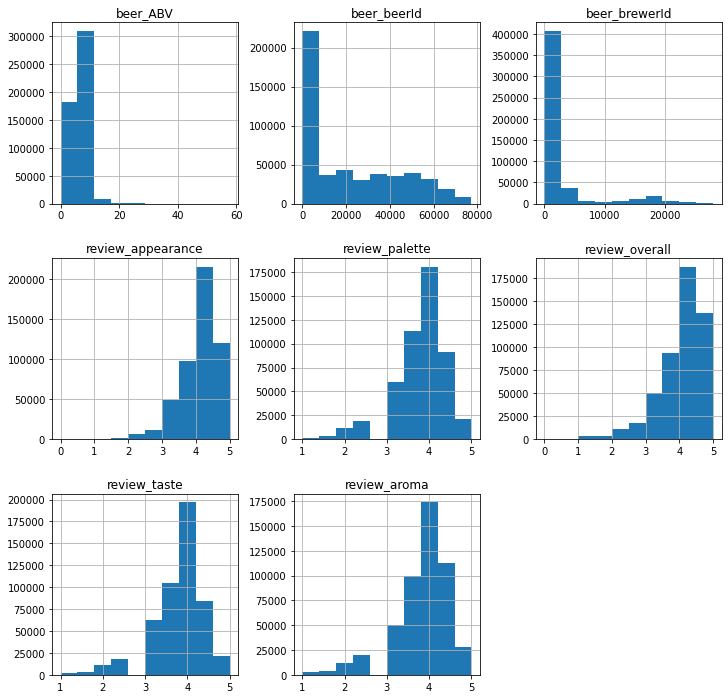

In [88]:
# Histogram of all numeric features
data.hist(figsize=(12,12))
plt.show()

* **beer_abv**	(Skewed right)	Most beers are less than 20% ABV

* **beer_beerid**	(Skewed right)	Lower IDs have more reviews than higher IDs

* **brewery_id**	(Skewed right)	Lower IDs have more reviews than higher IDs

* **review_appearance**	(Skewed left)	Most beers rated 4 and higher

* **review_aroma**	(Normal)	Most beers rated between 3 and 4

* **review_overall**	(Skewed left)	Most beers rated 4 and higher

* **review_palate**	(Normal)	Most beers rated between 3 and 4

* **review_taste**	Normal	Most beers rated between 3.5 and 4.5


> **Ratings of 0**

>> Since ratings are on a scale of 1-5, any values in review variables that are less than 1 are not suitable for analysis.

In [89]:
# Ratings of 0
# Since ratings are on a scale of 1-5,
# any values in review variables that are less than 1 are not suitable for analysis.

# Review scores of >= 1
data = data[(data['review_overall'] >= 1) | \
        (data['review_appearance'] >= 1)]

# Check it out
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502766 entries, 492945 to 188052
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            502766 non-null  float64       
 1   beer_beerId         502766 non-null  int64         
 2   beer_brewerId       502766 non-null  int64         
 3   beer_name           502766 non-null  object        
 4   beer_style          502766 non-null  object        
 5   review_appearance   502766 non-null  float64       
 6   review_palette      502766 non-null  float64       
 7   review_overall      502766 non-null  float64       
 8   review_taste        502766 non-null  float64       
 9   review_profileName  502766 non-null  object        
 10  review_aroma        502766 non-null  float64       
 11  review_text         502766 non-null  object        
 12  review_time         502766 non-null  datetime64[ns]
dtypes: datetime64[ns](1), fl

>> There were only 3 reviews with ratings of less than 1 here which is basically negligible. However, it's always a good idea to check for numbers which don't make sense in your dataset.

---
---
---
---

# **QUESTION AND ANSWERS**

### **1) Which brewery produces the strongest beers by alcohol beverage percent?**

Top 10 Strongest Beers by ABV( Alcohol by Volume)

In [90]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [91]:
# Top 10 Beers by ABV
top_10_abv = data[['beer_name','beer_ABV']].\
    sort_values('beer_ABV', ascending=False). \
    drop_duplicates('beer_name').\
    head(10).\
    sort_values('beer_ABV', ascending=True)

# Combine brewery and beer name for readability
#top_10_abv['combined_name'] = top_10_abv['brewery_name'].str.\
  #cat(top_10_abv['beer_name'], sep=' : ')

# Plot it
p = [go.Bar(x = top_10_abv['beer_ABV'] / 100,
            y = top_10_abv['beer_name'],
            hoverinfo = 'x',
            
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]


In [92]:
# Pieces of Flair
layout = go.Layout(title='Top 10 Strongest Beers by ABV',
                   xaxis=dict(title="ABV",
                              tickformat = "%",
                              hoverformat = '.2%'),
                   margin = dict(l = 220),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)


The strongest beer produced is 57% ABV produced by Schorschbrau. 

---
---
---

### **2)	Which year did beers enjoy the highest ratings?**

In [93]:
data['year'] = data['review_time'].dt.year

In [94]:
data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",2008-09-09 23:35:21,2008
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",2005-10-13 08:35:11,2005
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,2009-02-19 01:29:41,2009
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,2008-02-20 03:05:01,2008
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,2005-12-23 00:05:52,2005


In [95]:
data['year'].count()

502766

In [96]:
data["review_overall"].value_counts()

4.0    187460
4.5    106785
3.5     93270
3.0     50180
5.0     30092
2.5     17205
2.0     11047
1.5      3663
1.0      3064
Name: review_overall, dtype: int64

AVERAGE OVERALL RATINGS OVER THE YEARS 

Grouping on Year and getting the mean.

In [97]:
Yearly_Avg_Rating=data.groupby(['year'])['review_overall'].mean().reset_index()

In [98]:
Yearly_Avg_Rating

,year,review_overall
0,1998,4.045455
1,1999,4.000000
2,2000,4.241379
3,2001,3.963687
4,2002,3.822886
5,2003,3.775693
6,2004,3.807436
7,2005,3.846319
8,2006,3.809792
9,2007,3.820352


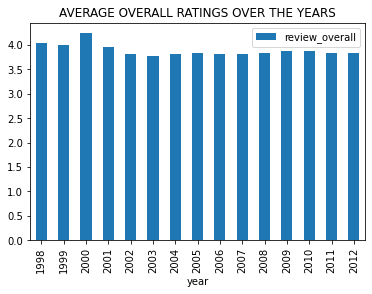

In [99]:
Yearly_Avg_Rating.plot(x="year",y=["review_overall"],kind="bar",title="AVERAGE OVERALL RATINGS OVER THE YEARS")
plt.show()

> Year 2000 got the highest overall rating of 4.24 followed by year 1998 and 1999 with overall rating of 4.045 and 4.000 respectively.

---

In [100]:
condition = data["year"].astype(int) < 2022

prodcount = (data[condition][["year", "review_overall"]]
             .groupby("year")
             .count()
            )

prodcount.tail()

,review_overall
year,
2008,65765
2009,80293
2010,90351
2011,107021
2012,3058


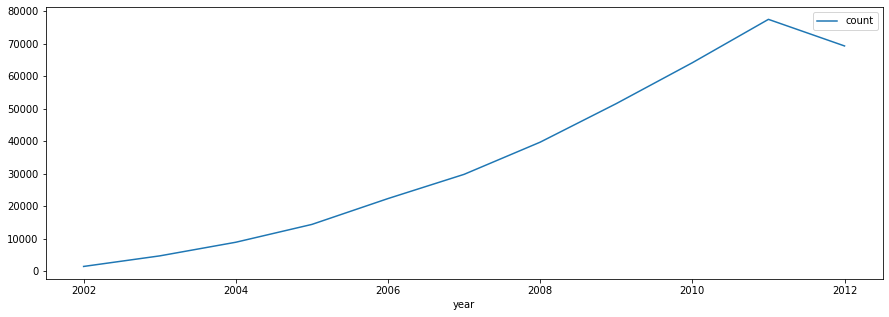

In [101]:
(prodcount
 .rolling(5).mean().rename(columns={"review_overall":"count"})
 .plot(figsize=(15,5),
       )
)

> Year 2011 got higest number of reviews

---
---
---

### **3)Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?**

Correlation with Target

In [102]:
# Method 1 - Heatmap: Pandas
# List of numeric factors to include
factors = ["review_appearance","review_aroma","review_palette","review_taste", "review_overall"]

# Create a correlation matrix 
corr_metrics = data[factors].corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review_appearance,review_aroma,review_palette,review_taste,review_overall
review_appearance,1.000000,0.530761,0.544353,0.551510,0.482716
review_aroma,0.530761,1.000000,0.702969,0.722349,0.780248
review_palette,0.544353,0.702969,1.000000,0.600340,0.597762
review_taste,0.551510,0.722349,0.600340,1.000000,0.688937
review_overall,0.482716,0.780248,0.597762,0.688937,1.000000



The heatmap above shows the correlation of review features. The darker the color, the higher the correlation between the two features.

We can get the information as follows:

review_aroma has the highest correlation with review_overall, at 0.7802, followed by review_test, at 0.722.


In [103]:
import seaborn as sns

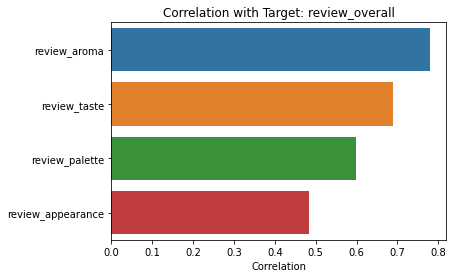

<Figure size 864x576 with 0 Axes>

In [104]:
# Method 2 - Bar Chart: Seaborn
# Correlation with target review_overall
factor_corr = corr_metrics[['review_overall']]\
    .drop(['review_overall'])\
    .reset_index()\
    .sort_values('review_overall', ascending=True)

# Plot it with Seaborn just for fun
sns.barplot(data=factor_corr.sort_values('review_overall', ascending=False), y="index",x="review_overall")
plt.ylabel(""); plt.xlabel("Correlation")
plt.title("Correlation with Target: review_overall")
plt.figure(figsize=(12,8))
plt.show()

There is high correlation between review_aroma and the target variable review_overall.

---
---
---

### **4) If you were to recommend 3 beers to your friends based on this data which ones will you recommend?**

Simplest Recommendation

If I have to recommend 3 beers to somebody who is new to beer (i.e. does not have a style preference), then I'll first narrow down to the most popular beers and subsequently find the highest rated beers amongst that subset.



In [105]:
# Pivot table with overall rating
top_3_rec = data[['beer_name','review_overall']]\
    .pivot_table(index="beer_name", aggfunc=("count",'mean','median'))\
    .dropna()

# Rename columns and flatten pivot table
top_3_rec.columns = top_3_rec.columns.to_series().str.join('_')
top_3_rec.reset_index(inplace=True)

# Filter for highest rated beers
top_3_rec = top_3_rec.query('review_overall_count >= 1000')\
  .sort_values('review_overall_mean', ascending=False)\
  .head(3)

# Check it out
top_3_rec

,beer_name,review_overall_count,review_overall_mean,review_overall_median
4661,Founders KBS (Kentucky Breakfast Stout),1873,4.402029,4.5
12865,Tröegs Nugget Nectar,1878,4.394835,4.5
4614,Founders Breakfast Stout,2443,4.359394,4.5


>> Above 3 beers can be recommend on the basis of high rating.However we can also use Recommendation Engine with PySpark

---
---
---

### **5) Which Beer style seems to be the favorite based on reviews written by users?** 




### **6)How does written review compare to overall review score for the beer styles?**

In [106]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'year'],
      dtype='object')

In [107]:
# Considering only relevant columns

reviewTextData = data[['beer_beerId','beer_name','beer_ABV','beer_style','review_overall','review_text']]

In [108]:
# lets consider the higher reviews only to calculate the polarity score of review_text and compare it with overall review

reviewTextData = reviewTextData.loc[reviewTextData['review_overall'] >= 4]

In [109]:
#library to clean data
import re

#Initial text processing to deconstruct the short forms

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [110]:
#for loader/show percentage operation done
from tqdm import tqdm
tqdm.pandas()

In [111]:
#Extracting text reciews and applying text pre-processing on it.

preprocessed_reviews = []

for sentance in tqdm(reviewTextData['review_text'].values): # tqdm is for printing the status bar
    sentance = decontracted(sentance) #desconstructiong the short forms
    sentance = re.sub("\S*\d\S*", "", sentance).strip() #remove words with numbers 
    
    preprocessed_reviews.append(sentance) #form the sentence again

100%|██████████| 324337/324337 [00:33<00:00, 9709.99it/s] 


In [112]:
#Appending preprocessed reviews to the filtered dataframe

reviewTextData['preprocessed_review_text'] = preprocessed_reviews

In [113]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [114]:
# Instantiating Sentiment Analyzer

sianalyzer = SentimentIntensityAnalyzer()

In [115]:
#loop over the 'preprocessed_review_text' column and calculate the polarity score for each review. 

reviewTextData['polarity_score2'] = reviewTextData['preprocessed_review_text'].progress_apply(lambda x: sianalyzer.polarity_scores(x)['compound'])

100%|██████████| 324337/324337 [09:25<00:00, 573.86it/s]


In [116]:
# Groupping by the 'beer_beerId' and calculate mean polarity score.

reviewTextDataGroupped = reviewTextData.groupby('beer_style')['polarity_score2'].mean()


In [117]:
# Lets Sort the groupped data by mean polarity score

reviewTextDataGroupped.sort_values(ascending=False)[0:5]


beer_style
Braggot                      0.924622
Happoshu                     0.919091
Dortmunder / Export Lager    0.907618
Wheatwine                    0.896163
Quadrupel (Quad)             0.891744
Name: polarity_score2, dtype: float64

In [118]:
# Obsering the top 'polarity_score2' and 'beer_beerId' associated with it.
reviewTextData.loc[reviewTextData['beer_style'] == 'Braggot']


,beer_beerId,beer_name,beer_ABV,beer_style,review_overall,review_text,preprocessed_review_text,polarity_score2
9061,5972,Luna De Miel: Raspberry Meade,7.82,Braggot,5.0,750 ml crowned bottle. I bought this with no i...,ml crowned bottle. I bought this with no idea ...,0.8906
468763,69407,Sixteen,10.50,Braggot,5.0,"Weyerbacher Sixteen on tap at The Pony Bar, HK...","Weyerbacher Sixteen on tap at The Pony Bar, HK...",0.9974
468782,69407,Sixteen,10.50,Braggot,5.0,Now this is an awesome beer/mead combo!! A-Dee...,Now this is an awesome beer/mead combo!! A-Dee...,0.9821
259822,55238,Apico,16.30,Braggot,4.5,Kept seeing this in various beer stores but di...,Kept seeing this in various beer stores but di...,0.9770
468731,69407,Sixteen,10.50,Braggot,4.5,A - Dark brown with ruby accent. Smallish head...,A - Dark brown with ruby accent. Smallish head...,0.9815
...,...,...,...,...,...,...,...,...
9064,5972,Luna De Miel: Raspberry Meade,7.82,Braggot,4.0,Luna de Miel - Harmonious Honeymoon Ale - is q...,Luna de Miel - Harmonious Honeymoon Ale - is q...,0.9892
476482,23369,Hawaiian Honey,13.00,Braggot,4.0,Sampled on-tap at the brewpub. 90 lbs of clove...,Sampled on-tap at the brewpub. lbs of clover ...,0.6712
186098,50450,Bob's Memorial Braggot,7.00,Braggot,4.0,Served in Deschuttes Brewery's stemmed Jubel 2...,Served in Deschuttes Brewery is stemmed Jubel ...,0.9433
186096,50450,Bob's Memorial Braggot,7.00,Braggot,4.0,This beer appears reddish brown with a small l...,This beer appears reddish brown with a small l...,0.8945


By Observing the mean compund ploarity score ,  we can say that the beer style "Braggot" is quite most famous.
    
By Observing the mean compund ploarity score calculated we can get an idea how the user written review text is collaborating in calculating the overall review score.

## **7. How do find similar beer drinkers by using written reviews only?**   

To slove this question we can use text analysis methodology as describe below:

**Text Analysis Methodology**

1. **Information Extraction**

* This is the first step in the process of evaluating unstructured data. This first involves finding the data and cleaning it of unnecessary punctuation, typos and so on. 
* This then involves tokenization and identification of named entities (a named entity is a real-world object, such as persons, locations, organizations, product), key phrases and parts-of-speech. 
* It then uses the concept of pattern matching to find any predefined sequences existing in the data. You can then identify the relationship between entities and attributes. The endpoint is to have a database that is at least semi-structured.

2. **Categorization**
* Then we can develop an input-output principle where the system is given inputs regarding the pre-defined categories under which the data in the new documents are to be classified. 
* This is a statistical step and uses sophisticated techniques such as Nearest Neighbour classifier, Decision Tree, Naïve Bayesian classifier, and other statistical classification techniques. 
* We will end up with some categories assigned automatically to the text

3. **Clustering**
* This is again a sophisticated step where we bring together groups of documents that have similar content and generate multiple groups of documents known as clusters. 
* The content of documents in a specific cluster is similar while that of documents in different clusters should by definition be quite different. 
* This technique works on semantics – the principle on which semantic search engines work.

4. **Visualization**
* Most of the complex statistical and AI work has been done at this stage. Here we use visual cues such as text flags to indicate documents or document categories and develop other ways to identify and indicate the densities of a category, entity or phrase. 
* The user needs to have an overview as well as to be able to zoom in without losing data. If the original source was large, some kind of visual hierarchy will also need to be developed. 

* At this stage, we begin to integrate with existing business processes to understand how and who will need to use the knowledge developed.

5. **Summarization**
The objective here is to generate a summarized version highlighting the information that will be most relevant to the user. This in itself requires the application of algorithms to summarize text automatically with a semantic engine to ensure the meaning isn’t lost.